# Machine Learning Final Project - Heart Disease
## Group Member: Elva Ge, Grace Tang, Yushang Chen, Jiahao Wang, Enze Zhao


### Objective: Our goal is to dive deep into the dataset utilizing machine learning models that we have learned in class and compare different models to find one that best fit the dataset. 
### Dataset Source: Kaggle (Personal key indicators of heart disease)
* This is the link to the dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [19]:
# Load tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib
# Make plots appear in notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib as mpl

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline

np.random.seed(42)

## Heart Disease Data Info
* HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
* BMI: Body Mass Index (BMI)
* Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
* AlcoholDrinking： Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
* Stroke：(Ever told) (you had) a stroke?
* PhysicalHealth：Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
* MentalHealth：Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)
* DiffWalking：Do you have serious difficulty walking or climbing stairs?
* Sex：Are you male or female?
* AgeCategory：Fourteen-level age category
* Race: Imputed race/ethnicity value
* Diabetic: (Ever told) (you had) diabetes?
* PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
* GenHealth: Would you say that in general your health is...
* SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
* Asthma: (Ever told) (you had) asthma?
* KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
* SkinCancer: (Ever told) (you had) skin cancer?

## Data Preprocessing

### Loading Dataset

In [3]:
# Read in data from csv file with Pandas tool
df = pd.read_csv('heart_2020_cleaned.csv')
# Print all predictors
print(df.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [4]:
df.head

<bound method NDFrame.head of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  Age

### Checking Null Value

In [5]:
# Check NA's in each column
num_values     = len(df)-df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'number_values':num_values,
                                 'percent_missing': percent_missing})
print(missing_value_df[missing_value_df['percent_missing']>0])

Empty DataFrame
Columns: [column_name, number_values, percent_missing]
Index: []


In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### Dealing with qualitative predictors

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import category_encoders as ce
from matplotlib import colors as c
from matplotlib import gridspec as grid

In [8]:
# Enconding categorical variables
t_df = df

#Binary encoding variables: HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Diabetic, Physical Activity, Asthma, KidneyDisease, SkinCancer
binary_cols = ['HeartDisease','Sex','Smoking','AlcoholDrinking','Stroke','Asthma', 'DiffWalking','PhysicalActivity','KidneyDisease','SkinCancer']

for col in binary_cols:
    t_df[col] = t_df[col].replace(list(t_df[col].unique()),[0,1])


#One hot encoding for variables: Race
race_encoder=ce.OneHotEncoder(cols='Race',handle_unknown='return_nan',return_df=True,use_cat_names=True)

diabetic_encoder = ce.OneHotEncoder(cols='Diabetic', handle_unknown='return_nan', return_df=True, use_cat_names=True)

#Ordinal encoding for variables: AgeCategory, GenHealth

age_encoder= ce.OrdinalEncoder(cols=['AgeCategory'],return_df=True,
                           mapping=[{'col':'AgeCategory',
'mapping':{'18-24':0, '25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}}])


health_encoder = ce.OrdinalEncoder(cols=['GenHealth'], return_df=True,
                                    mapping=[{'col':'GenHealth',
                                            'mapping':{'Poor':0,'Fair':1,'Good':2,'Very good':3,'Excellent':4}}])


t_df = age_encoder.fit_transform(t_df)
t_df = health_encoder.fit_transform(t_df)
t_df = race_encoder.fit_transform(t_df)
t_df = diabetic_encoder.fit_transform(t_df)

t_df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,0,0,0,3.0,30.0,0,0,7,...,1.0,0.0,0.0,0.0,0,3,5.0,0,0,0
1,0,20.34,1,0,1,0.0,0.0,0,0,12,...,0.0,1.0,0.0,0.0,0,3,7.0,1,0,1
2,0,26.58,0,0,0,20.0,30.0,0,1,9,...,1.0,0.0,0.0,0.0,0,1,8.0,0,0,1
3,0,24.21,1,0,0,0.0,0.0,0,0,11,...,0.0,1.0,0.0,0.0,1,2,6.0,1,0,0
4,0,23.71,1,0,0,28.0,0.0,1,0,4,...,0.0,1.0,0.0,0.0,0,3,8.0,1,0,1


In [9]:
X = t_df.drop('HeartDisease',axis=1)
y = t_df['HeartDisease']

In [10]:
print(np.mean(y))

0.08559545959130067


* Given the result of mean y, we can see that this is a very unbalanced dataset. Random guessing (0) would get you about 92 percent accuracy.

### Dealing with unbalanced dataset

In [11]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(t_df.drop('HeartDisease', axis=1), t_df['HeartDisease'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [12]:
oversampled['HeartDisease'].value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [13]:
print(oversampled_X)

              BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0       16.600000        0                0       0        3.000000   
1       20.340000        1                0       1        0.000000   
2       26.580000        0                0       0       20.000000   
3       24.210000        1                0       0        0.000000   
4       23.710000        1                0       0       28.000000   
...           ...      ...              ...     ...             ...   
584839  23.489440        1                0       0        0.000000   
584840  28.995898        0                0       0        0.000000   
584841  36.570562        0                0       0       20.000000   
584842  22.370468        0                0       0        0.000000   
584843  27.153178        0                0       0        0.141713   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race_White  ...  \
0           30.00000            0    0            7         1.0  ...   
1  

In [14]:
print(oversampled_Y)

0         0
1         0
2         0
3         0
4         0
         ..
584839    1
584840    1
584841    1
584842    1
584843    1
Name: HeartDisease, Length: 584844, dtype: int64


In [15]:
oversampled.shape

(584844, 26)

## Comparing Different Models

## 1. Linear

In [17]:
lr = LinearRegression()
nmc = 250
testSize = 0.25
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
CVInfo = cross_validate(lr, oversampled_X, oversampled_Y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.38014020914145463
0.3803201663940235


## 2. Logistic

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

fullModel = Pipeline([('scaler', StandardScaler()), ('Logistic', LogisticRegression(penalty="none",solver="lbfgs"))])
fullModel.fit(oversampled_X, oversampled_Y)
shuffle = ShuffleSplit(n_splits=250, test_size=0.25)
CVInfo = cross_validate(fullModel, oversampled_X, oversampled_Y, cv=shuffle,return_train_score=True)
print("Logistic mean score on trainning sample is: ",np.mean(CVInfo['train_score']))
print("Logistic mean score on testing sample is: ",np.mean(CVInfo['test_score']))

Logistic mean score on trainning sample is:  0.7843890268174077
Logistic mean score on testing sample is:  0.7843549390948698


## 3. KNN

In [18]:
#Create a subset by selecting the first 2000 columns
first_n_columns = t_df.iloc[:2000, :]
sub_X, sub_Y = sm.fit_resample(first_n_columns.drop('HeartDisease', axis=1), first_n_columns['HeartDisease'])
subset = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

best_neighbors= 2


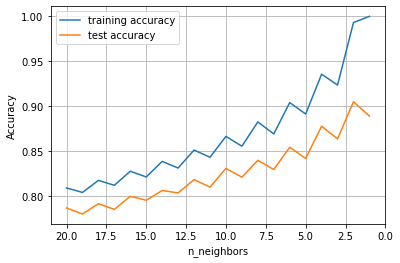

In [19]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 21)
shuffle = ShuffleSplit(n_splits=200, test_size=.25)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    CVInfo = cross_validate(knn, sub_X, sub_Y, cv=shuffle,return_train_score=True)
    # record train accuracy
    training_accuracy.append(np.mean(CVInfo['train_score']))
    # record test accuracy
    test_accuracy.append(np.mean(CVInfo['test_score']))

fig, ax = plt.subplots()
ax.plot(neighbors_settings, training_accuracy, label="training accuracy")
ax.plot(neighbors_settings, test_accuracy, label="test accuracy")
ax.set_xlim(21, 0)
ax.set_ylabel("Accuracy")
ax.set_xlabel("n_neighbors")
ax.grid()
ax.legend()

nbest = np.argmax(test_accuracy)
best_neighbors = neighbors_settings[nbest]
print("best_neighbors=",best_neighbors)

In [20]:
knn = KNeighborsClassifier(n_neighbors=2)
shuffle = ShuffleSplit(n_splits=200, test_size=.25)
CVInfo = cross_validate(knn, sub_X, sub_Y, cv=shuffle,return_train_score=True,n_jobs=-1)
print("KNN mean score on trainning sample is", np.mean(CVInfo['train_score']))
print("KNN mean score on testing sample is", np.mean(CVInfo['test_score']))

KNN mean score on trainning sample is 0.9931481481481481
KNN mean score on testing sample is 0.9056414662084769


## 4. LASSO

In [21]:
nmc = 250
alphas = np.array([0.0001,0.001,0.03])
shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
for a in alphas:
    fullModel = make_pipeline(StandardScaler(), Lasso(alpha=a))
    CVInfo = cross_validate(fullModel, oversampled_X, oversampled_Y, cv=shuffle,return_train_score=True,n_jobs=10)
    print("Alpha=",a)
    print(np.mean(CVInfo['train_score']))
    print(np.mean(CVInfo['test_score']))

Alpha= 0.0001
0.3802241786755736
0.38006711060091436
Alpha= 0.001
0.380116798218628
0.38012185967996787
Alpha= 0.03
0.3502806750513856
0.3500997129477509


## 5. Ridge

In [20]:
fullModel = make_pipeline(MinMaxScaler(),Ridge())
#fullModel.fit(Xs,y)
param_grid={'ridge__alpha':[0.0001,0.001,0.01,0.05,0.1,0.25,0.5,1, 2,  5., 10., 100., 250., 500., 1000.]}
shuffle = ShuffleSplit(n_splits=100, test_size=0.25)
grid_search=GridSearchCV(fullModel,param_grid,cv=shuffle,
                              return_train_score=True,n_jobs=-1)
grid_search.fit(oversampled_X,oversampled_Y)
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_ridge__alpha']])

print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

# This is best model
best_model = grid_search.best_estimator_

    rank_test_score  mean_test_score param_ridge__alpha
0                11         0.380129             0.0001
1                10         0.380129              0.001
2                 9         0.380129               0.01
3                 8         0.380129               0.05
4                 7         0.380129                0.1
5                 6         0.380129               0.25
6                 5         0.380129                0.5
7                 4         0.380129                  1
8                 3         0.380129                  2
9                 2         0.380129                5.0
10                1         0.380129               10.0
11               12         0.380126              100.0
12               13         0.380112              250.0
13               14         0.380063              500.0
14               15         0.379880             1000.0
best param: {'ridge__alpha': 10.0}
best model: Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('ridge

## 6. Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
cvf = ShuffleSplit(n_splits=100, test_size=0.25)
scores = cross_val_score(dtr, oversampled_X, oversampled_Y, cv=cvf)
print(np.mean(scores))

0.5350528396881312


In [23]:
X_trainValid, X_test, y_trainValid, y_test = train_test_split(oversampled_X,oversampled_Y,test_size=0.25,random_state=42)

# Try decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
nmc = 100
#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_depth':[5,10,15,20]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.25,n_splits=nmc)
# set up search
grid_search=GridSearchCV(DecisionTreeRegressor(),param_grid,cv=cvf,return_train_score=True,n_jobs=-1)
# implement search
grid_search.fit(X_trainValid,y_trainValid)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','mean_train_score','param_max_depth']])

# Print best params and model
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

   rank_test_score  mean_test_score  mean_train_score param_max_depth
0                4         0.370118          0.370538               5
1                3         0.465811          0.477740              10
2                2         0.512376          0.597679              15
3                1         0.523632          0.755486              20
best param: {'max_depth': 20}
best model: DecisionTreeRegressor(max_depth=20)
best test score: 0.5236322407552703


In [24]:
best_model = grid_search.best_estimator_

shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
CVInfo = cross_validate(best_model, X_trainValid, y_trainValid, cv=shuffle,return_train_score=True,n_jobs=-1)

print("Best Model Result:")
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

print("Final test sample:")
best_model.fit(X_trainValid,y_trainValid)
print(best_model.score(X_test,y_test))

Best Model Result:
0.7558888954953342
0.5233649050159385
Final test sample:
0.5412123911742339


## 7. Random Forest

In [25]:
first_n_columns = t_df.iloc[:2000, :]
sub_X, sub_Y = sm.fit_resample(first_n_columns.drop('HeartDisease', axis=1), first_n_columns['HeartDisease'])
subset = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [26]:
X_trainValid, X_test, y_trainValid, y_test = train_test_split(sub_X, sub_Y, test_size=0.25, random_state=42)

# Try for random forest and grid search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
nmc = 100
#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[5,10,15,20,25],'max_depth':[5,10,15,20],'n_estimators':[20]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.25,n_splits=nmc)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(),param_grid,cv=cvf,return_train_score=True,n_jobs=-1)
# implement search
grid_search.fit(X_trainValid,y_trainValid)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])

# Print best params and model
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

    rank_test_score  mean_test_score param_max_features param_max_depth
0                20         0.531152                  5               5
1                17         0.552209                 10               5
2                16         0.553352                 15               5
3                18         0.551697                 20               5
4                19         0.550827                 25               5
5                13         0.664432                  5              10
6                11         0.670024                 10              10
7                12         0.667516                 15              10
8                14         0.662279                 20              10
9                15         0.660545                 25              10
10                3         0.700889                  5              15
11                4         0.696278                 10              15
12                6         0.690280                 15         

In [27]:
best_model = grid_search.best_estimator_

CVInfo = cross_validate(best_model, X_trainValid, y_trainValid, cv=shuffle,return_train_score=True,n_jobs=-1)

print("Best Model Result:")
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

print("Final test sample:")
best_model.fit(X_trainValid,y_trainValid)
print(best_model.score(X_test,y_test))

Best Model Result:
0.9510843148886332
0.7065718874696876
Final test sample:
0.7248901343489291


## 8. Gradient Boosting

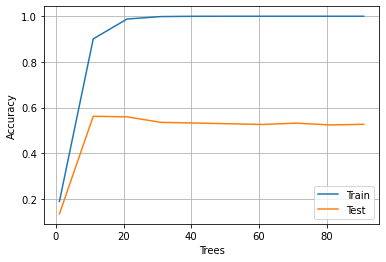

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

scoreTrainList = []
scoreTestList  = []
scoreTestx = []

treeSet = np.arange(start=1,stop=100,step=10,dtype=int)
nSets = len(treeSet)
treeScores = np.zeros(nSets)
for i in range(nSets):
    gbr = GradientBoostingRegressor(n_estimators=treeSet[i],max_depth=20,learning_rate=0.1)
    cvf = ShuffleSplit(n_splits=100, test_size=0.25)
    CVInfo = cross_validate(gbr, sub_X, sub_Y, cv=shuffle,return_train_score=True,n_jobs=-1)
    scoreTrainList.append(np.mean(CVInfo['train_score']))
    scoreTestList.append(np.mean(CVInfo['test_score']))
    scoreTestx.append(treeSet[i])
plt.plot(scoreTestx,scoreTrainList,label="Train")
plt.plot(scoreTestx,scoreTestList,label="Test")
plt.xlabel("Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

## 9. Neural Network

In [7]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [8]:
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras import layers

In [9]:
# Check for GPU
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
#     if IS_COLAB:
#         print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [22]:
X_train_full, X_test, y_train_full, y_test = train_test_split(oversampled_X, oversampled_Y,test_size=0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
model = keras.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 30)                780       
                                                                 
 dense_22 (Dense)            (None, 30)                930       
                                                                 
 dense_23 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,741
Trainable params: 1,741
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid),batch_size=3200)

Epoch 1/40
103/103 [==============================] - 1s 9ms/step - loss: 0.3730 - accuracy: 0.8258 - val_loss: 0.3780 - val_accuracy: 0.8240
Epoch 2/40
103/103 [==============================] - 1s 8ms/step - loss: 0.3731 - accuracy: 0.8254 - val_loss: 0.3789 - val_accuracy: 0.8232
Epoch 3/40
103/103 [==============================] - 1s 8ms/step - loss: 0.3732 - accuracy: 0.8256 - val_loss: 0.3780 - val_accuracy: 0.8233
Epoch 4/40
103/103 [==============================] - 1s 8ms/step - loss: 0.3726 - accuracy: 0.8263 - val_loss: 0.3783 - val_accuracy: 0.8228
Epoch 5/40
103/103 [==============================] - 1s 8ms/step - loss: 0.3726 - accuracy: 0.8257 - val_loss: 0.3777 - val_accuracy: 0.8237
Epoch 6/40
103/103 [==============================] - 1s 8ms/step - loss: 0.3728 - accuracy: 0.8257 - val_loss: 0.3785 - val_accuracy: 0.8228
Epoch 7/40
103/103 [==============================] - 1s 8ms/step - loss: 0.3726 - accuracy: 0.8260 - val_loss: 0.3784 - val_accuracy: 0.8233
Epoch 

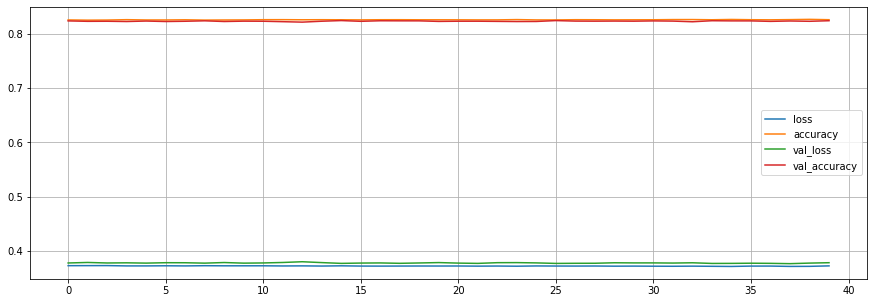

In [58]:
pd.DataFrame(history.history).plot(figsize=(15, 5))
plt.grid(True)
#plt.gca().set_xlim(0,20)
#plt.gca().set_ylim(0, 1)
plt.show()

In [59]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.827, Test: 0.825


# Conclusion:

* Models which used cross-validation were using nmc = 250 or 100, test size = 0.25
* Models with hyper-parameters were using grid search to find the best model and get the test scores.

* Test Score:
* Linear Model: 0.3803201663940235
* Logistic Model: 0.7843549390948698
* KNN Model: 0.9056414662084769
* Ridge Model: 0.38012878116834614
* Lasso Model: 0.38006711060091436
* Decision Tree Regressor: 0.5412123911742339
* Random Forest: 0.7248901343489291
* Neural Network: 0.825

* Although KNN model seems like working pretty good here, it might becasue the smote method we used to oversample our unblanced target variable was based on knn method. So, KNN model might not make that good results in real data. 
* Besides that, the Neural Network do the best job. Alothough the loss function graph seems a little bit strange, it might because that this problem is too simple for the Neural Network so that the curve of loss function is like a straigt line. The model of optimizer is 'Adam', and the model of loss function is 'binary_crossentropy'.
* Random Forest and Decision Tree were the second and third best model, but the score is just okay. (Both of them are applied grid search and validation data method)
